In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
data_train = pd.read_csv('Titanic_train.csv')
data_test = pd.read_csv('Titanic_test.csv')

In [8]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data_train.shape

(891, 12)

In [10]:
data_test.shape

(418, 11)

In [11]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We need to do something regarding the missing values in columns 'Age', 'Cabin', 'Embarked' and 'Fare'. We ll get to that Later

We have seens in the past(or in movies) that whenever a disasters happens. Women and children are the one who are save first. Let see is it true in this case

In [14]:
data_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
data_test['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [16]:
data_train['Sex'].value_counts().sum()

891

In [17]:
total_male = data_train['Sex'].value_counts()[0]
male_percentage =  total_male / data_train['Sex'].value_counts().sum() * 100
male_percentage

64.75869809203144

In [18]:
total_female = data_train['Sex'].value_counts()[1]
female_percentage = total_female / data_train['Sex'].value_counts().sum() * 100
female_percentage

35.24130190796858

If we consider our training set then there are total 891 people on board, amoung them 577(65%) are men and 314(35%) are women

But what about children?

Now we need to find the number of children, This is where 'Age' colun comes into picture

But remember there are total 891 records in our training data set in which we know values for 714 records. 

One thing we can do is replace the null/missing values with the average(mean)/median

In [19]:
data_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
data_train['Age'].median()

28.0

In [21]:
data_test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [22]:
data_test['Age'].median()

27.0

Now that we can We know the mean and median values What we can do is replace it with mean/median.

I choose to do it with median because mean is sometimes affected by the outliers. You can do a quick google search regarding it.

In [23]:
data_train['Age'].fillna(data_train['Age'].median(), inplace=True)

In [24]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [25]:
data_test['Age'].fillna(data_test['Age'].median(), inplace=True)

In [26]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


You guyz must be wondering, Why are we handling null/missing values in our test data?

Because our model is going to classify the test data based on these columns. If we keep the null values as it is, then the model wont be able to classify accurately

Now we can find the number of children's in our training dataset

Im considering a male/female below age of 18 to be a child

In [27]:
total_childers = data_train[data_train['Age'] <= 18].shape[0]
total_childers

139

There are total 139 chiildren, but we dont know there gener yet.

In [28]:
data_train[data_train['Age'] <= 18]['Sex'].value_counts()

male      71
female    68
Name: Sex, dtype: int64

In [29]:
total_male = total_male - data_train[data_train['Age'] <= 18]['Sex'].value_counts()[0]
total_male

506

In [30]:
total_female = total_female - data_train[data_train['Age'] <= 18]['Sex'].value_counts()[1]
total_female

246

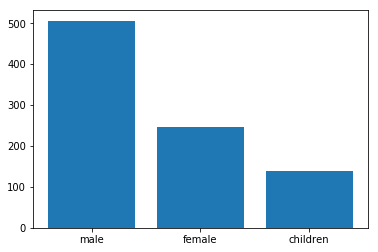

In [34]:
plt.bar(np.array(['male','female','children']),np.array([total_male, total_female, total_childers]))
plt.show()

Lets build a baseline model assuming that all women and children where saved and all mend died.

In [37]:
data_test['Survived'] = 0
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [61]:
worst_model = data_test.copy()
worst_model.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [62]:
worst_model.loc[(worst_model['Sex'] == 'female') | (worst_model['Age'] <= 18), 'Survived'] = 1

In [60]:
pd.DataFrame({'PassengerId':worst_model['PassengerId'], 'Survived':worst_model['Survived']}); #to_csv('Only women and children survived.csv', index=False)

When i submit this to kaggle i got accuracy of ~ 74%

This will be our base model. Every model after this should have accuracy > 74%

Now lets try to look from a different perspective. Those who have seen the titanic movie knows that, the water started entering to ship from lower half of the ship. So this tells us that people having cabins/rooms on upper half of the ship MIGHT have higher chance of surviving. Lets try this hypothesis out.

'Fare' column would help us to understand it. Rooms/cabins having lowest fare would be near bottom of the ship and those near to top of the ship would have highest fare.

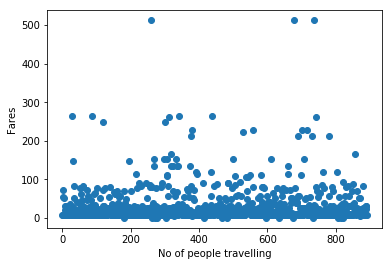

In [89]:
plt.scatter(x=np.array(range(0, data_train.shape[0])), y=np.array(data_train['Fare']))
plt.xlabel('No of people travelling')
plt.ylabel('Fares')
plt.show()

In [119]:
data_train.loc[data_train['Fare'] >= 80, 'Survived'].value_counts()

1    59
0    17
Name: Survived, dtype: int64

In [118]:
data_train.loc[data_train['Fare'] < 80, 'Survived'].value_counts()

0    532
1    283
Name: Survived, dtype: int64